## 单层神经网络实现

# 背景

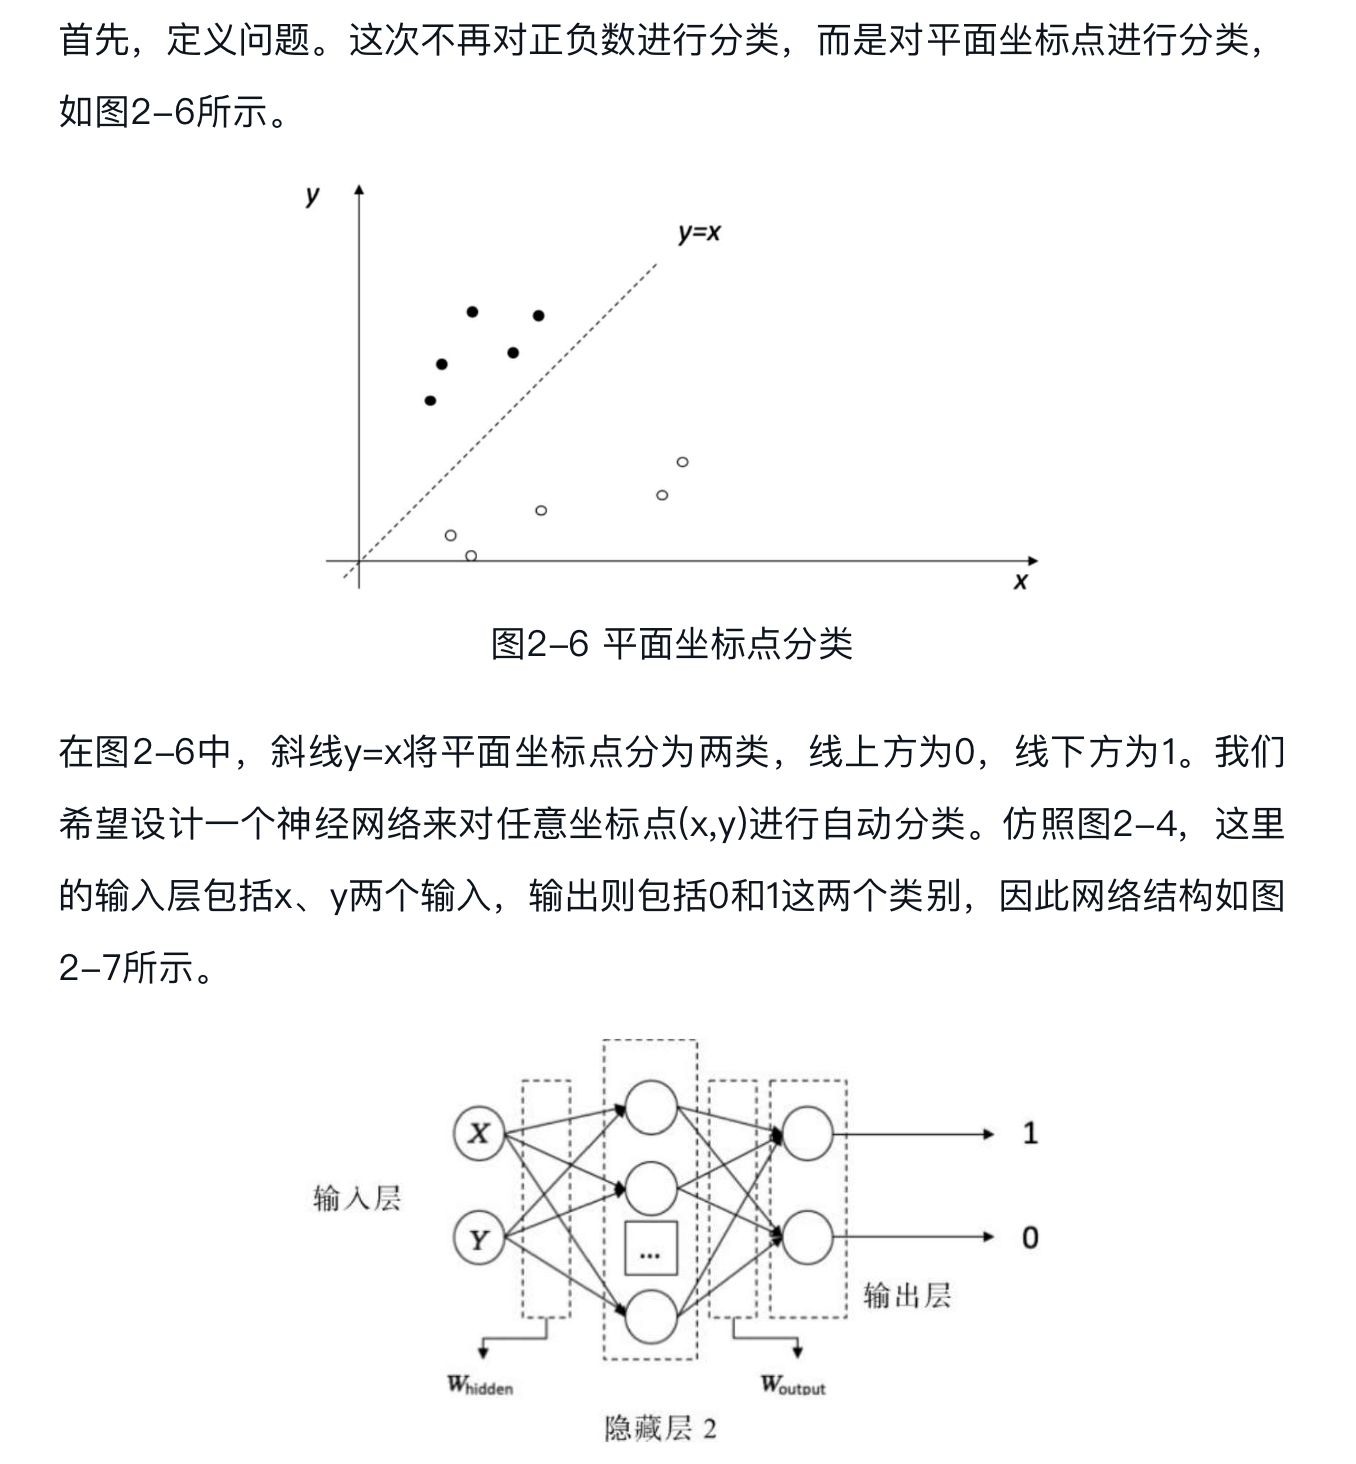

In [60]:
# 定义训练集和测试集
dataset = [
	[2.7810836,4.550537003,0], 
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1], 
	[5.332441248,2.088626775,1], 
	[6.922596716,1.77106367,1]
]

test_data = [
	[1.465489372,2.362125076,0],
	[8.675418651,-0.242068655,1], 
	[17.673756466,3.508563011,1]
]

# 定义输入和输出的个数
n_inputs = 2	# 输入是 x,y 的坐标
n_outputs = 2	

### 初始化神经网络

In [61]:
from random import random

def initialize_network(n_inputs, n_hidden, n_outputs):
    '''
    初始化神经网络, 定义一个隐藏层

    n_inputs: 输入个数
    n_hidden: 隐藏层神经元个数
    n_outputs: 输出个数
    '''
    network = list()

    # 隐藏层
    hidden_layer = [{'weights': [random() for i in range(n_inputs+1)]} for i in range(n_hidden)]
    # 输出层
    output_layer = [{'weights': [random() for i in range(n_hidden+1)]} for i in range(n_outputs)]

    network.append(hidden_layer)
    network.append(output_layer)
    return network

### 定义前向传播

In [62]:
import math

def net_input(weights, inputs):
    '''
    每个神经元的网络输入
    '''
    total_input = weights[-1]
    for i in range(len(weights)-1):
        total_input += weights[i] * inputs[i]
    return total_input

def activation(total_input):
    '''
    激活函数

    将网络输入映射到(-1,1)区间
    '''
    return 1.0 / (1.0+math.exp(-total_input))

def forwart_propagate(network, row):
    '''
    前向传播

    对每一层, 都把上一层的输出作为下一层的输入进行循环计算
    '''
    inputs = row
    for layer in network:
        outputs = []
        # 对每个神经元进行net_input处理
        for neuron in layer:
            total_input = net_input(neuron['weights'], inputs)
            # 将获得的total input结果再输入激活函数activation中，获得该神经元的最终结果
            neuron['output'] = activation(total_input)
            # 添加到该层的输出中
            outputs.append(neuron['output'])
        # 把当前层的输出作为下一层的输入
        inputs = outputs
    return inputs

### 反向传播

和正向传播不同的是: 激活函数不再是直接的线性方程，而是使用了sigmoid激活函数

简单看一下sigmoid激活函数的形式和求导结果：
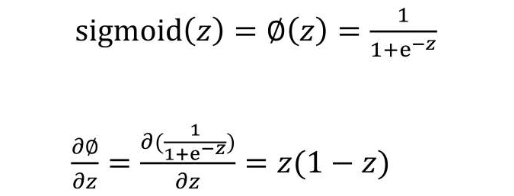

In [63]:
def cost_function(expected, outputs):
    n = len(expected)
    total_error = 0.0
    for i in range(n):
        total_error += (expected[i] - outputs[i]) ** 2
    return total_error


def transfer_derivative(output):
    '''
    sigmod激活函数
    '''
    return output * (1.0 - output)

def backward_propagate(network, expected):
    '''
    反向传播
    '''
    # 从网络的最后一层开始计算
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        # 对输出层和隐藏层分开计算
        if i == len(network) - 1:
            # 输出层
            for j in range(len(layer)):
                neuron = layer[j]
                error = -2 * (expected[j] - neuron['output'])
                errors.append(error)
        else:
            # 隐藏层
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i+1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])


def update_weights(network, row, learning_rate):
    '''
    更新权重
    '''
    # 顺序遍历所有层
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i-1]]
        # 对所有神经元遍历
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] -= learning_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] -= learning_rate * neuron['delta']

### 网路训练和调整

In [64]:
def train_network(network, training_data, learning_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in training_data:
            # 进行前向传播获得最终输出
            outputs = forwart_propagate(network, row)
            # 对每组输入数据创建对应的期望输出, 同时对相应位置置1
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += cost_function(expected, outputs)
            # 进行反向传播设置每个神经元的delta属性
            backward_propagate(network, expected)
            # 更新权重
            update_weights(network, row, learning_rate)
        print(f'epoch:{epoch} sum_error:{sum_error}')


def predict(network, row):
    '''
    预测
    '''
    outputs = forwart_propagate(network, row)
    return outputs.index(max(outputs))

In [65]:
# 初始化(设置隐藏层只有2个神经元)
network = initialize_network(n_inputs, 2, n_outputs)
# 训练
train_network(network, training_data=dataset, learning_rate=0.5, n_epoch=20, n_outputs=n_outputs)


epoch:0 sum_error:4.770855275983774
epoch:1 sum_error:3.9510784414343347
epoch:2 sum_error:3.630368109866567
epoch:3 sum_error:3.4265708146299914
epoch:4 sum_error:3.1482936463102607
epoch:5 sum_error:2.8071298517068324
epoch:6 sum_error:2.4500105001841908
epoch:7 sum_error:2.1211565501302374
epoch:8 sum_error:1.8376196225420356
epoch:9 sum_error:1.5966793838251967
epoch:10 sum_error:1.392531536290631
epoch:11 sum_error:1.2202540852401407
epoch:12 sum_error:1.0754975423268238
epoch:13 sum_error:0.9541369314311411
epoch:14 sum_error:0.8522995843763992
epoch:15 sum_error:0.7665272868825558
epoch:16 sum_error:0.693876882488012
epoch:17 sum_error:0.6319254097201505
epoch:18 sum_error:0.5787159307412121
epoch:19 sum_error:0.5326819280076971


In [66]:
for row in test_data:
    result = predict(network, row)
    print(f'expected: {row[-1]}   =>   predicted:{result}')

expected: 0   =>   predicted:0
expected: 1   =>   predicted:1
expected: 1   =>   predicted:1
